In [1]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# Data processing, modeling, and model evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt 
import seaborn as sns

# Randomization
import random



In [2]:
# Load and check data

dataframeA = pd.read_csv('5. Dataset Feature Dropping/MeterA_featureSelection.csv')
#display(dataframeA.head())
dataframeA.head()

dataframeA = dataframeA.drop('Unnamed: 0', axis=1)

featuresVector = dataframeA[['Flatness ratio','Symmetry','Crossflow','Average speed of sound','Average Gain']]

# yLbl is Class Attruibute labels

yLbl = dataframeA[['Class Attruibute']]

#featuresVector
featuresVector

,Flatness ratio,Symmetry,Crossflow,Average speed of sound,Average Gain
0,1.000000,0.408325,0.028575,-0.097028,0.387698
1,0.408325,1.000000,0.391777,-0.521473,-0.274037
2,0.028575,0.391777,1.000000,-0.474339,-0.610221
3,-0.097028,-0.521473,-0.474339,1.000000,0.567345
4,0.387698,-0.274037,-0.610221,0.567345,1.000000
5,-0.544890,-0.236005,0.162365,0.139247,-0.137049


In [12]:
dataframeA['Class Attruibute'].value_counts()
featuresVector.shape

(6, 5)

In [4]:
# the scaler object (model)
scaler = StandardScaler()

# fit and transform the data
scaled_data = scaler.fit_transform(featuresVector) 
#scaled_data1 = scaler.fit_transform(dataframeA)

#print(dataframeA)
print("------------------------------  scaled data for A -----------------------------")
print(scaled_data)

#print("-----------------------------------------------------------")
#print(scaled_data[:6])

#95% of variance
#to select the number of components

#pca = PCA(n_components = 0.95)
#pca.fit(scaled_data)
#reduced = pca.transform(scaled_data)

#reduced

------------------------------  scaled data for A -----------------------------
[[ 1.66746974  0.53855124 -0.1012108  -0.36544952  0.42452117]
 [ 0.43865363  1.67565429  0.57388449 -1.1436628  -0.7859493 ]
 [-0.35002839  0.50674868  1.7044069  -1.05724214 -1.40090978]
 [-0.61088516 -1.24837012 -1.03599099  1.64593165  0.7531372 ]
 [ 0.39581502 -0.7728373  -1.28855944  0.85266589  1.54456636]
 [-1.54102484 -0.6997468   0.14746984  0.06775692 -0.53536564]]


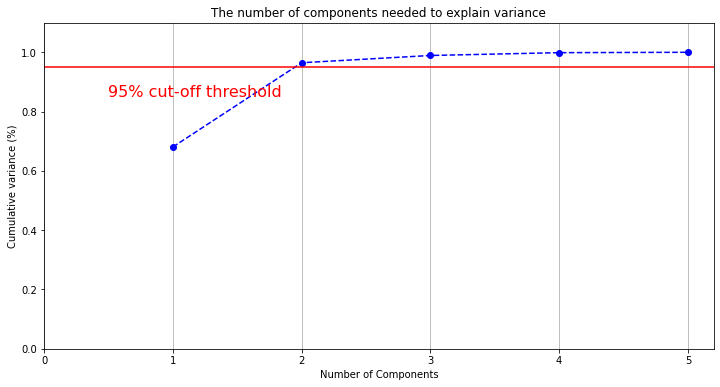

In [5]:
#https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/
pca = PCA().fit(scaled_data)

# matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 6, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 6, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

[4.08395459 1.70439145 0.14703527 0.05708547 0.00753322]
6.0
5


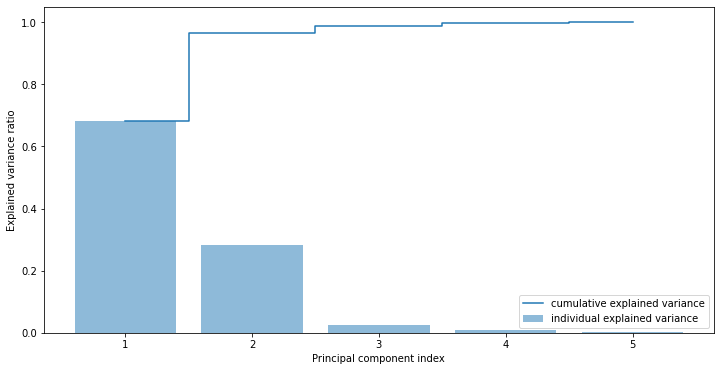

In [6]:
# calculate cumulative sum of explained variances
pca = PCA().fit(scaled_data)

tot = sum(pca.explained_variance_)
print("---------------PCA - DATA A : EXPLAIN VARIANCE--------------")
print(pca.explained_variance_)
print("---------------PCA - DATA A : SUM VARIANCE--------------")
print(tot)
var_exp = [(i / tot) for i in sorted(pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("---------------PCA - DATA A : SIZE OF VARIANCE --------------")
print(len(var_exp))
# plot explained variances
plt.bar(range(1,6), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,6), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

#only the first two components capture almost all the variance in the dataset. 
#So, we decide to select only the first two components

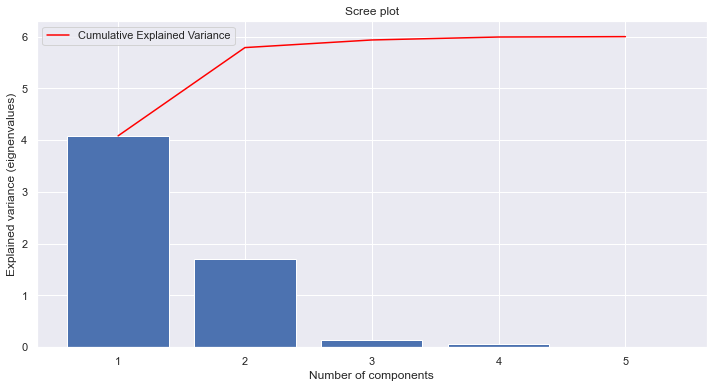

In [7]:
#https://www.jcchouinard.com/pca-with-python/
#from sklearn.decomposition import PCA
sns.set()
 
pca = PCA(n_components=5)
#pca = PCA().fit(scaled_data)
 
# Fit and transform data
reduced_features = pca.fit_transform(scaled_data)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()

In [8]:
# Based on the diagrams aboved, only the first two components capture almost all the variance in the dataset. 
#So, we decide to select only the first two components for PCA (DataSet A)

In [16]:
pca = PCA(n_components=2)

pca_features = pca.fit_transform(scaled_data)
 
print('Shape before PCA: ', scaled_data.shape)
print('Shape after PCA: ', pca_features.shape)
 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])

finalDf_A = pd.concat([pca_df, dataframeA['Class Attruibute']], axis = 1)

print("------------------------------  PCA For A  -----------------------------")
finalDf_A


Shape before PCA:  (6, 5)
Shape after PCA:  (6, 2)
------------------------------  PCA For A  -----------------------------


,PC1,PC2,Class Attruibute
0,-0.306794,1.782739,-0.544890
1,-2.097754,0.685044,-0.236005
2,-2.319141,-0.870140,0.162365
3,2.393019,-0.640885,0.139247
4,2.191033,0.796169,-0.137049
5,0.139637,-1.752927,1.000000


# DATA SET B

In [10]:
# for dataset B

# Load and check data

dataframeB = pd.read_csv('5. Dataset Feature Dropping/MeterB_featureSelection.csv')
#display(dataframeA.head())
dataframeB.head()

dataframeB = dataframeB.drop('Unnamed: 0', axis=1)

featuresVector_B = dataframeB[['Profile factor','Symmetry','Crossflow','Swirl Angle','Average flow velocity','Average speed of sound','Average Signal Strength','Average Signal Strength','Meter performance','Average Gain','Average Transit Time']]

# yLbl is Class Attruibute labels

yLblForB = dataframeB[['Class Attruibute']]

#featuresVector
featuresVector_B

,Profile factor,Symmetry,Crossflow,Swirl Angle,Average flow velocity,Average speed of sound,Average Signal Strength,Average Signal Strength,Meter performance,Average Gain,Average Transit Time
0,1.000000,0.086970,0.142981,0.273414,-0.107355,0.310062,0.110142,0.110142,0.109664,0.266056,-0.017972
1,0.086970,1.000000,0.864351,0.586335,0.234741,0.672907,0.207810,0.207810,0.498788,0.486987,0.610867
2,0.142981,0.864351,1.000000,0.566279,0.281386,0.400907,0.404807,0.404807,0.674737,0.122603,0.817884
3,0.273414,0.586335,0.566279,1.000000,0.044375,0.728706,-0.154019,-0.154019,0.077485,0.633772,0.168176
4,-0.107355,0.234741,0.281386,0.044375,1.000000,0.093754,-0.081098,-0.081098,0.036731,0.032667,0.198722
5,0.310062,0.672907,0.400907,0.728706,0.093754,1.000000,-0.123021,-0.123021,0.110242,0.930006,-0.060619
6,0.110142,0.207810,0.404807,-0.154019,-0.081098,-0.123021,1.000000,1.000000,0.830472,-0.366030,0.468920
7,0.109664,0.498788,0.674737,0.077485,0.036731,0.110242,0.830472,0.830472,1.000000,-0.197602,0.684898
8,0.266056,0.486987,0.122603,0.633772,0.032667,0.930006,-0.366030,-0.366030,-0.197602,1.000000,-0.299860
9,-0.017972,0.610867,0.817884,0.168176,0.198722,-0.060619,0.468920,0.468920,0.684898,-0.299860,1.000000


In [13]:
# the scaler object (model)
#scaler = StandardScaler()

# fit and transform the data
scaled_data_B = scaler.fit_transform(featuresVector_B) 
#scaled_data1 = scaler.fit_transform(dataframeA)

#print(dataframeA)
print("------------------------------  scaled data for B -----------------------------")
print(scaled_data_B)


------------------------------  scaled data for B -----------------------------
[[ 2.7836699  -1.63196092 -1.26412454 -0.44375658 -0.93514618 -0.3434916
  -0.14811824 -0.14811824 -0.55494489 -0.09127935 -0.78448002]
 [-0.50907966  1.83916846  1.25362796  0.45710047  0.24964471  0.59608874
   0.07487263  0.07487263  0.41867271  0.37903747  0.73229194]
 [-0.3070835   1.32346163  1.72707553  0.39936192  0.41119365 -0.10824865
   0.52464603  0.52464603  0.85891225 -0.39666128  1.23162182]
 [ 0.16331016  0.26650843  0.21328586  1.64798632 -0.40965556  0.74058008
  -0.75123768 -0.75123768 -0.63545936  0.69151184 -0.33548657]
 [-1.20989377 -1.07017168 -0.78105672 -1.10312863  2.89999232 -0.90361553
  -0.5847467  -0.5847467  -0.73742791 -0.58811672 -0.26180839]
 [ 0.29547644  0.59563574 -0.36390012  0.86696872 -0.23863949  1.44308916
  -0.68046451 -0.68046451 -0.55349867  1.32213458 -0.88734508]
 [-0.42551308 -1.17255508 -0.3502875  -1.674279   -0.84420901 -1.46495051
   1.88355789  1.88355789

In [33]:
print('Shape before PCA: ', scaled_data_B.shape)

Shape before PCA:  (11, 11)


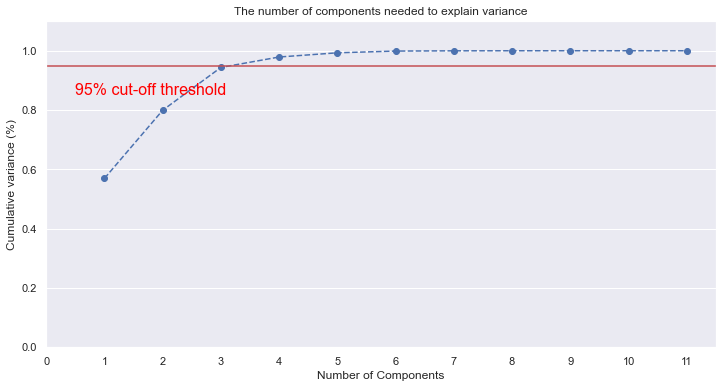

In [34]:
# calculate cumulative sum of explained variances
pcaB = PCA().fit(scaled_data_B)

# matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 12, step=1)
y = np.cumsum(pcaB.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 12, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

#components needed: 3

---------------PCA - DATA B : EXPLAIN VARIANCE--------------
[6.89288606e+00 2.77934350e+00 1.74681813e+00 4.25492273e-01
 1.71324026e-01 7.11037177e-02 1.00159227e-02 2.49917494e-03
 4.62494655e-04 5.46986331e-05 2.40997719e-35]
---------------PCA - DATA B : SUM VARIANCE--------------
12.100000000000012
---------------PCA - DATA A : SIZE OF VARIANCE --------------
11


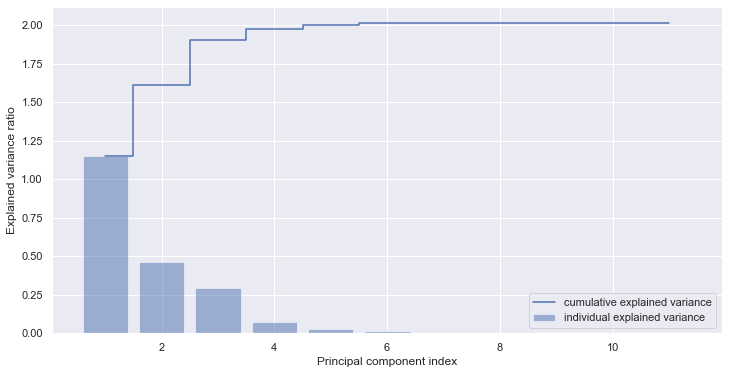

In [35]:
# calculate cumulative sum of explained variances
pcaB = PCA().fit(scaled_data_B)

total_B = sum(pcaB.explained_variance_)
print("---------------PCA - DATA B : EXPLAIN VARIANCE--------------")
print(pcaB.explained_variance_)
print("---------------PCA - DATA B : SUM VARIANCE--------------")
print(total_B)
var_exp_B = [(i / tot) for i in sorted(pcaB.explained_variance_, reverse=True)]
cum_var_exp_B = np.cumsum(var_exp_B)
print("---------------PCA - DATA A : SIZE OF VARIANCE --------------")
print(len(var_exp_B))
# plot explained variances
plt.bar(range(1,12), var_exp_B, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,12), cum_var_exp_B, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()


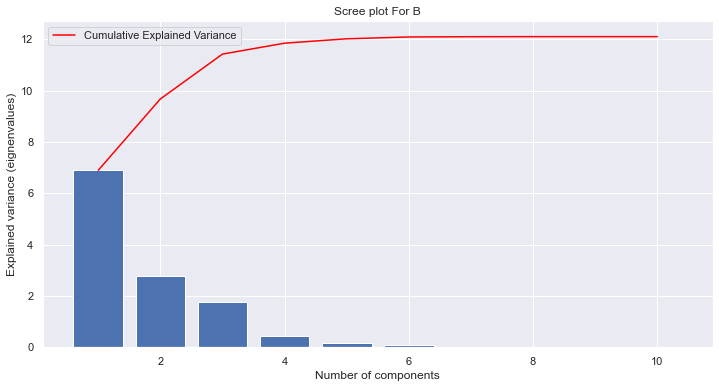

In [59]:
#https://www.jcchouinard.com/pca-with-python/
sns.set()
 
# Reduce from 5 to 3 features with PCA
pcaB = PCA(n_components=10)
 
# Fit and transform data
reduced_features = pcaB.fit_transform(scaled_data_B)#featuresVector_B)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pcaB.explained_variance_)+1),
    pcaB.explained_variance_
    )
 
plt.plot(
    range(1,len(pcaB.explained_variance_ )+1),
    np.cumsum(pcaB.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot For B')
 
plt.show()

#pca = 3

#only the first 3 components capture almost all the variance in the dataset. 
#So, we decide to select only the first 3 components

In [39]:
pca_B = PCA(n_components=3)

pca_features_B = pca_B.fit_transform(scaled_data_B)
 
print('Shape before PCA: ', scaled_data_B.shape)
print('Shape after PCA: ', pca_features_B.shape)
 
pca_df_B = pd.DataFrame(
    data=pca_features_B, 
    columns=['PC1', 'PC2', 'PC3'])

finalDf_B = pd.concat([pca_df_B, dataframeB['Class Attruibute']], axis = 1)

print("------------------------------  PCA For B  -----------------------------")
finalDf_B

Shape before PCA:  (11, 11)
Shape after PCA:  (11, 3)
------------------------------  PCA For B  -----------------------------


,PC1,PC2,PC3,Class Attruibute
0,-1.177939,3.000807,-1.455937,0.335473
1,0.412338,-2.493733,-0.170184,0.428815
2,1.725349,-2.144139,-0.227039,0.280929
3,-1.933359,-1.017326,-0.457484,0.778603
4,0.183695,1.194973,3.706068,0.055320
5,-2.442252,-0.780045,-0.440350,0.806872
6,3.536317,2.066214,-0.679557,-0.372800
7,3.297495,0.225674,-0.722171,-0.179381
8,-3.487115,0.356737,0.073542,0.789680
9,3.034071,-0.634720,0.375549,-0.191096


# PCA FOR DATA SET C

In [40]:
# for dataset B

# Load and check data

dataframeC = pd.read_csv('5. Dataset Feature Dropping/MeterC_featureSelection.csv')
#display(dataframeA.head())
dataframeC.head()

dataframeC = dataframeC.drop('Unnamed: 0', axis=1)

featuresVector_C = dataframeC[['Profile factor','Symmetry','Crossflow','Average Flow Velocity','Average Gain','Average Signal Quality','Average Signal Strength']]

# yLbl is Class Attruibute labels

yLblForC = dataframeC[['Class Attruibute']]

#featuresVector
featuresVector_C

,Profile factor,Symmetry,Crossflow,Average Flow Velocity,Average Gain,Average Signal Quality,Average Signal Strength
0,1.000000,-0.093528,-0.021763,-0.229035,-0.092883,0.148659,0.086501
1,-0.093528,1.000000,0.761681,-0.288817,0.079153,0.246798,0.072524
2,-0.021763,0.761681,1.000000,-0.251021,-0.101640,0.333315,-0.177180
3,-0.229035,-0.288817,-0.251021,1.000000,-0.150391,-0.650013,-0.169830
4,-0.092883,0.079153,-0.101640,-0.150391,1.000000,-0.587659,0.937608
5,0.148659,0.246798,0.333315,-0.650013,-0.587659,1.000000,-0.564413
6,0.086501,0.072524,-0.177180,-0.169830,0.937608,-0.564413,1.000000
7,0.499323,-0.442014,-0.257584,-0.012486,-0.045947,-0.032696,0.027934


In [41]:
# fit and transform the data
scaled_data_C = scaler.fit_transform(featuresVector_C) 
#scaled_data1 = scaler.fit_transform(dataframeA)

#print(dataframeA)
print("------------------------------  scaled data for C -----------------------------")
print(scaled_data_C)


------------------------------  scaled data for C -----------------------------
[[ 2.22061865 -0.56229019 -0.40107988 -0.30183506 -0.43054727  0.30327312
  -0.12752478]
 [-0.67767455  1.79807228  1.32079905 -0.43541004 -0.09789308  0.48709532
  -0.15488811]
 [-0.48746815  1.28366425  1.8445848  -0.35095961 -0.44748057  0.64915078
  -0.64372099]
 [-1.03682494 -0.98381863 -0.90495155  2.44430818 -0.54174626 -1.19271355
  -0.6293318 ]
 [-0.67596613 -0.18956089 -0.57663772 -0.12611324  1.68268031 -1.0759189
   1.53864555]
 [-0.03578076  0.17229667  0.37932251 -1.24246381 -1.3872598   1.89791217
  -1.4017893 ]
 [-0.20052491 -0.20387126 -0.74266151 -0.16954704  1.56203656 -1.03237716
   1.66078834]
 [ 0.89362079 -1.31449223 -0.9193757   0.18202062 -0.33978989 -0.03642178
  -0.24217891]]


In [42]:
print('Shape before PCA: ', scaled_data_C.shape)

Shape before PCA:  (8, 7)


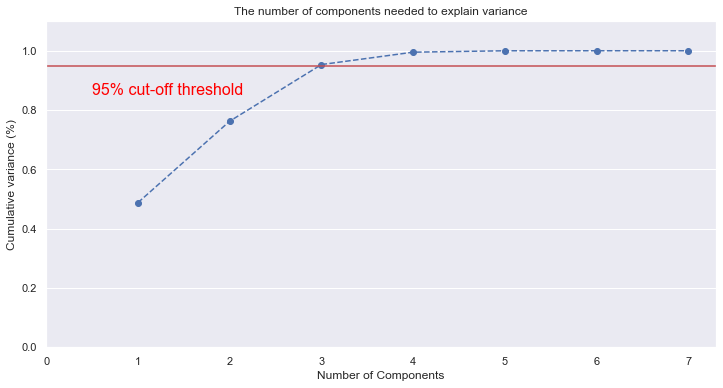

In [55]:
# calculate cumulative sum of explained variances
pcaC = PCA().fit(scaled_data_C)

# matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 8, step=1)
y = np.cumsum(pcaC.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 8, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

#components needed: 3

---------------PCA - DATA C : EXPLAIN VARIANCE--------------
[3.90246921e+00 2.19684514e+00 1.52795323e+00 3.33816847e-01
 3.80833592e-02 7.14675593e-04 1.17546502e-04]
---------------PCA - DATA C : SUM VARIANCE--------------
7.999999999999996
---------------PCA - DATA A : SIZE OF VARIANCE --------------
7


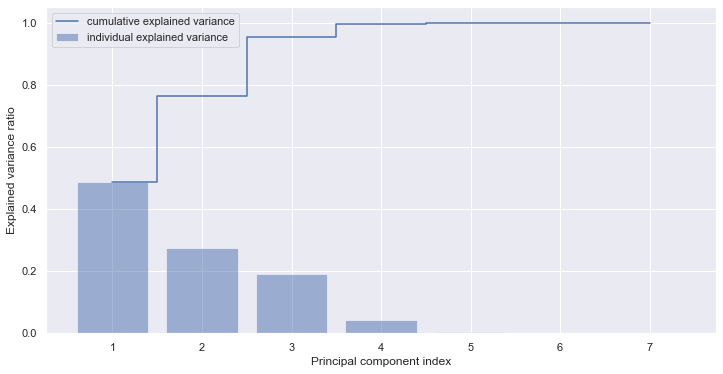

In [57]:
# calculate cumulative sum of explained variances

pcaC = PCA().fit(scaled_data_C)

totalC = sum(pcaC.explained_variance_)
print("---------------PCA - DATA C : EXPLAIN VARIANCE--------------")
print(pcaC.explained_variance_)
print("---------------PCA - DATA C : SUM VARIANCE--------------")
print(totalC)
var_exp_c = [(i / totalC) for i in sorted(pcaC.explained_variance_, reverse=True)]
cum_var_exp_c = np.cumsum(var_exp_c)
print("---------------PCA - DATA A : SIZE OF VARIANCE --------------")
print(len(var_exp_c))
# plot explained variances
plt.bar(range(1,8), var_exp_c, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,8), cum_var_exp_c, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

#only the first three components capture almost all the variance in the dataset. 
#So, we decide to select only the first three components

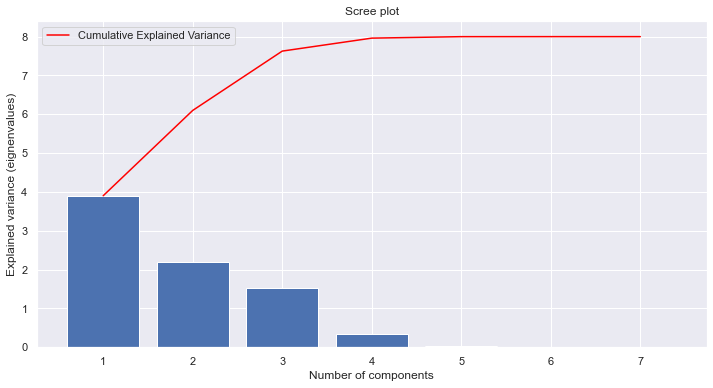

In [58]:
#https://www.jcchouinard.com/pca-with-python/
sns.set()
 
# Reduce from 5 to 3 features with PCA
pcaC = PCA(n_components=7)
 
# Fit and transform data
reduced_features = pcaC.fit_transform(scaled_data_C)#featuresVector_B)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pcaC.explained_variance_)+1),
    pcaC.explained_variance_
    )
 
plt.plot(
    range(1,len(pcaC.explained_variance_ )+1),
    np.cumsum(pcaC.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot for C')
 
plt.show()

#pca = 3

#only the first 3 components capture almost all the variance in the dataset. 
#So, we decide to select only the first 3 components

In [60]:
pca_C = PCA(n_components=3)

pca_features_C = pca_C.fit_transform(scaled_data_C)
 
print('Shape before PCA: ', scaled_data_C.shape)
print('Shape after PCA: ', pca_features_C.shape)
 
pca_df_C = pd.DataFrame(
    data=pca_features_C, 
    columns=['PC1', 'PC2', 'PC3'])

finalDf_C = pd.concat([pca_df_C, dataframeC['Class Attruibute']], axis = 1)

print("------------------------------  PCA For C  -----------------------------")
finalDf_C

Shape before PCA:  (8, 7)
Shape after PCA:  (8, 3)
------------------------------  PCA For C  -----------------------------


,PC1,PC2,PC3,Class Attruibute
0,0.203904,1.602646,-1.571403,0.499323
1,1.658448,-1.658626,0.441940,-0.442014
2,2.116368,-1.115075,0.618561,-0.257584
3,-1.683026,1.290574,2.536833,-0.012486
4,-2.161683,-1.466047,-0.472234,-0.045947
5,2.708653,0.847777,-0.228904,-0.032696
6,-2.184098,-1.192330,-0.835560,0.027934
7,-0.658568,1.691082,-0.489233,1.000000
